# PyTorch Assignment: Multi-Layer Perceptron (MLP)

Building an MLP on the MNIST data

In [25]:
%matplotlib inline

#import necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

#download train and test datasets from MNIST and transform to tensors
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

print("Number of MNIST training examples: {}".format(len(mnist_train)))
print("Number of MNIST test examples: {}".format(len(mnist_test)))


Number of MNIST training examples: 60000
Number of MNIST test examples: 10000


Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
The label for this image: 8


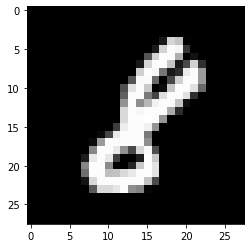

In [26]:
# Pick out the 9th (0-indexed) example from the training set
image, label = mnist_train[10001]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))

In [27]:
# DataLoader takes care of batching and shuffling
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 200, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 200, shuffle = False)
#create an iterator object
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()

In [28]:
#view() reshapes the tensor (tensor_name.view())
#Ex: a = torch.range(1, 16)
#a = a.view(4, 4) -> changes the above tensor 'a', from a 1x16 to a 4x4 tensor
#-1 parameter means that if you do not know how many rows you want, but are sure of the number of columns, you can 
# use -1 -> give me a tensor that has this many columns (28x28 below) and you compute the number of rows to make this 
#happen
x_2 = images.view(-1, 28*28)
print("The shape of input x_2: {}".format(x_2.shape))

The shape of input x_2: torch.Size([200, 784])


In [29]:
# Initalializing a 500-d hidden layer. W_500 is randomized and b starts at zero
W = torch.randn(784, 500)/np.sqrt(784)
W.requires_grad_()
#print(W_500)
b = torch.zeros(500, requires_grad=True)
#print(b_500)

In [30]:
#Perform a linear transform with W and b
y = torch.matmul(x_2, W) + b
print(y)

tensor([[-0.4060,  0.3533,  0.1263,  ..., -0.4602, -0.0892,  0.2790],
        [-0.3982,  0.1660,  0.1402,  ...,  0.0668,  0.0069, -0.0252],
        [-0.0941,  0.3177,  0.3979,  ..., -0.2908, -0.3049, -0.4494],
        ...,
        [-0.2490,  0.4897,  0.3237,  ..., -0.0070,  0.1024,  0.2005],
        [ 0.0413,  0.2355, -0.0094,  ..., -0.5556,  0.2227,  0.2373],
        [-0.0826, -0.3315,  0.7326,  ...,  0.1103, -0.1773,  0.0295]],
       grad_fn=<AddBackward0>)


In [31]:
#Including a nonlinearity via the rectified linear unit
y_relu_F = F.relu(y)
print(format(y_relu_F.shape))

print("x after ReLU with nn.functional: {}".format(y_relu_F))

torch.Size([200, 500])
x after ReLU with nn.functional: tensor([[0.0000, 0.3533, 0.1263,  ..., 0.0000, 0.0000, 0.2790],
        [0.0000, 0.1660, 0.1402,  ..., 0.0668, 0.0069, 0.0000],
        [0.0000, 0.3177, 0.3979,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.4897, 0.3237,  ..., 0.0000, 0.1024, 0.2005],
        [0.0413, 0.2355, 0.0000,  ..., 0.0000, 0.2227, 0.2373],
        [0.0000, 0.0000, 0.7326,  ..., 0.1103, 0.0000, 0.0295]],
       grad_fn=<ReluBackward0>)


In [32]:
# Initalializing a 10-d hidden layer. W is randomized and b starts at zero
#optimizer.zero_grad()
W_500 = torch.randn(500, 10)/np.sqrt(500)
W_500.requires_grad_()
#print(W)
b_500 = torch.zeros(10, requires_grad=True)
#print(b)

In [33]:
#Linear regression #2
y = torch.matmul(y_relu_F, W_500) + b_500

In [34]:
#Performing cross entropy, softmax is included within this function in PyTorch
cross_entropy = F.cross_entropy(y, labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy with torch.nn.functional.cross_entropy: 2.3494749069213867


In [35]:
#making the optimizer function, this will be Stoichastic Gradient Descent
optimizer = torch.optim.SGD([W,b,W_500,b_500], lr=0.1)
#print(optimizer)

In [36]:
#calling the backward function on the cross_entropy above to compute the gradients for W and b
cross_entropy.backward()
W.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [37]:
#updating the gradient step
optimizer.step()

In [38]:
#clear gradient buffers as gradients calculated by backward() accumulate
optimizer.zero_grad()

In [39]:
### Now that I have the completed steps and they all look good, I am adding the full MLP code below. 
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

#Initialize all variables
#First 
W = torch.randn(784, 500)/np.sqrt(784)
W.requires_grad_()
#print(W)
b = torch.zeros(500, requires_grad=True)
#print(b)
#Second
W2 = torch.randn(500, 10)/np.sqrt(500)
W2.requires_grad_()
#print(W2)
b2 = torch.zeros(10, requires_grad=True)
#print(b2)

optimizer = torch.optim.SGD([W,b,W2,b2], lr=0.05)

# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    
    # Forward pass
    x2 = images.view(-1, 28*28)
    y = torch.matmul(x2, W) + b
    y_relu = F.relu(y)
    y2_lay = torch.matmul(y_relu, W2) + b2
    cross_entropy = F.cross_entropy(y2_lay, labels)
    
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

In [40]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x2 = images.view(-1, 28*28)
        y = torch.matmul(x2, W) + b
        y_relu = F.relu(y)
        y2_lay = torch.matmul(y_relu, W2) + b2
        cross_entropy = F.cross_entropy(y2_lay, labels)
        
        
        predictions = torch.argmax(y2_lay, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))


Test accuracy: 0.9117000102996826
